## Breast Cancer Classifier with Tensorflow
## Business Understanding
Align headings to deck (stages)

Apply framework steps to build a classifier that is able to predict whether a tumor is benign or malignant.

# Data Understanding
The first file we will look at is the raw data provided by the University of Wisconsin.  This file was obtained from [the UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)

These first lines of code are common steps for setting up any python program.  We import our machine learning and statistical libraries.

In [12]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')

sns.set(color_codes=True)
%matplotlib inline

As you can see below the UCI file in its raw form is not very descriptive. It does not have column headers and there is no explanation of what the field (column or attribute) values should be.  It needs to be massaged in order to work with our tensorflow toolset. It also helps to be a bit more descriptive for human consumption.

In [13]:
originalDataFile = pd.read_csv('./breastcancer/breast-cancer-wisconsin-rawdata.csv.txt',
                               header=-1)
originalDataFile.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## Background Information
Attributes 1 through 9 have been used to represent instances of a tumor.  Each tumor has one of 2 possible classes: **benign** or **malignant** which is column 10

The dataset contains 699 records (as of the donated database on July 15th 1992).  Number of Attributes: 10 plus the class attribute

Attribute Information: (class attribute has been moved to last column)
<table>
    <tr>
        <td>&#35;</td><td>Attribute</td><td>Domain (variable type)</td>
    </tr>
    <tr>
        <td>0</td><td>Sample code number</td><td>id number</td>
    </tr>
    <tr>
        <td>1</td><td>Clump Thickness</td><td>integer between 1-10</td>
    </tr>
    <tr>
        <td>2</td><td>Uniformity of Cell Size</td><td>integer between 1-10 </td>
    </tr>
    <tr>
        <td>3</td><td>Uniformity of Cell Shape</td><td>integer between 1-10</td>
    </tr>
    <tr>
        <td>4</td><td>Marginal Adhesion</td><td>integer between 1-10</td>
    </tr>
    <tr>
        <td>5</td><td>Single Epithelial Cell Size</td><td>integer between 1-10</td>
    </tr>
    <tr>
        <td>6</td><td>Bare Nuclei</td><td>integer between 1-10</td>
    </tr>
    <tr>
        <td>7</td><td>Bland Chromatin</td><td>integer between 1-10</td>
    </tr>
    <tr>
        <td>8</td><td>Normal Nucleoli</td><td>integer between 1-10</td>
    </tr>
    <tr>
        <td>9</td><td>Mitoses</td><td>integer between 1-10</td>
    </tr>
    <tr>
        <td>10</td><td>Class:</td><td>(2 for benign, 4 for malignant)</td>
    </tr>
</table>
<br>
There are 16 instances (records) that contain a single missing 
(i.e., unavailable) attribute value, now denoted by "?".  

The original datafile has Class distribution as follows:<br>
Benign: 458 (65.5%)<br>
Malignant: 241 (34.5%)

## Data Preparation
Whether the missing attribute values was the result of an overworked scientist or just some other anomaly, we can’t be sure. So in our case, we’re going to simply drop these from our dataset.

In “the wild”, datasets including missing values are a common thorn in the side of the machine learning practitioner. Simply dumping the data is less than ideal, especially since more data generally aids in building a model with superior predictive power. There are many less naive ways of dealing with missing data points, but for our purposes, we will take the naive approach for now.

In addition to dropping out the records with missing attribute values we also need to drop the column in our data that corresponds to the patient’s ID. This piece of information has absolutely no predictive power when it comes to determining whether a tumor is cancerous or not, and will only confuse our model if we keep it in when training our neural network.

Also we want to know based on the information for each patient whether or not the tumor they have is **benign** or **malignant**. The way in which the data is encoded in the original text file is **“2”** for benign and **“4”** for malignant.  For TensorFlow, we’re going to want to encode these two cases not as “2” and “4”, but as **“0”** and **“1”** instead, to explicitly tell TensorFlow that there are two possible classes of output.

The data file we will be working with now looks as follows:

In [14]:
formattedDataFile = pd.read_csv('./breastcancer/combined_data.csv', 
                                header=0)
formattedDataFile.head()

,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


#### Data Analysis
Some simple statistics on the formatted data set can be achieved by describing the data with the describe function.  As you can see after dropping out the records with missing attributes we are left with 683 records.

In [15]:
formattedDataFile.describe()

,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,0.349927
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.477296
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


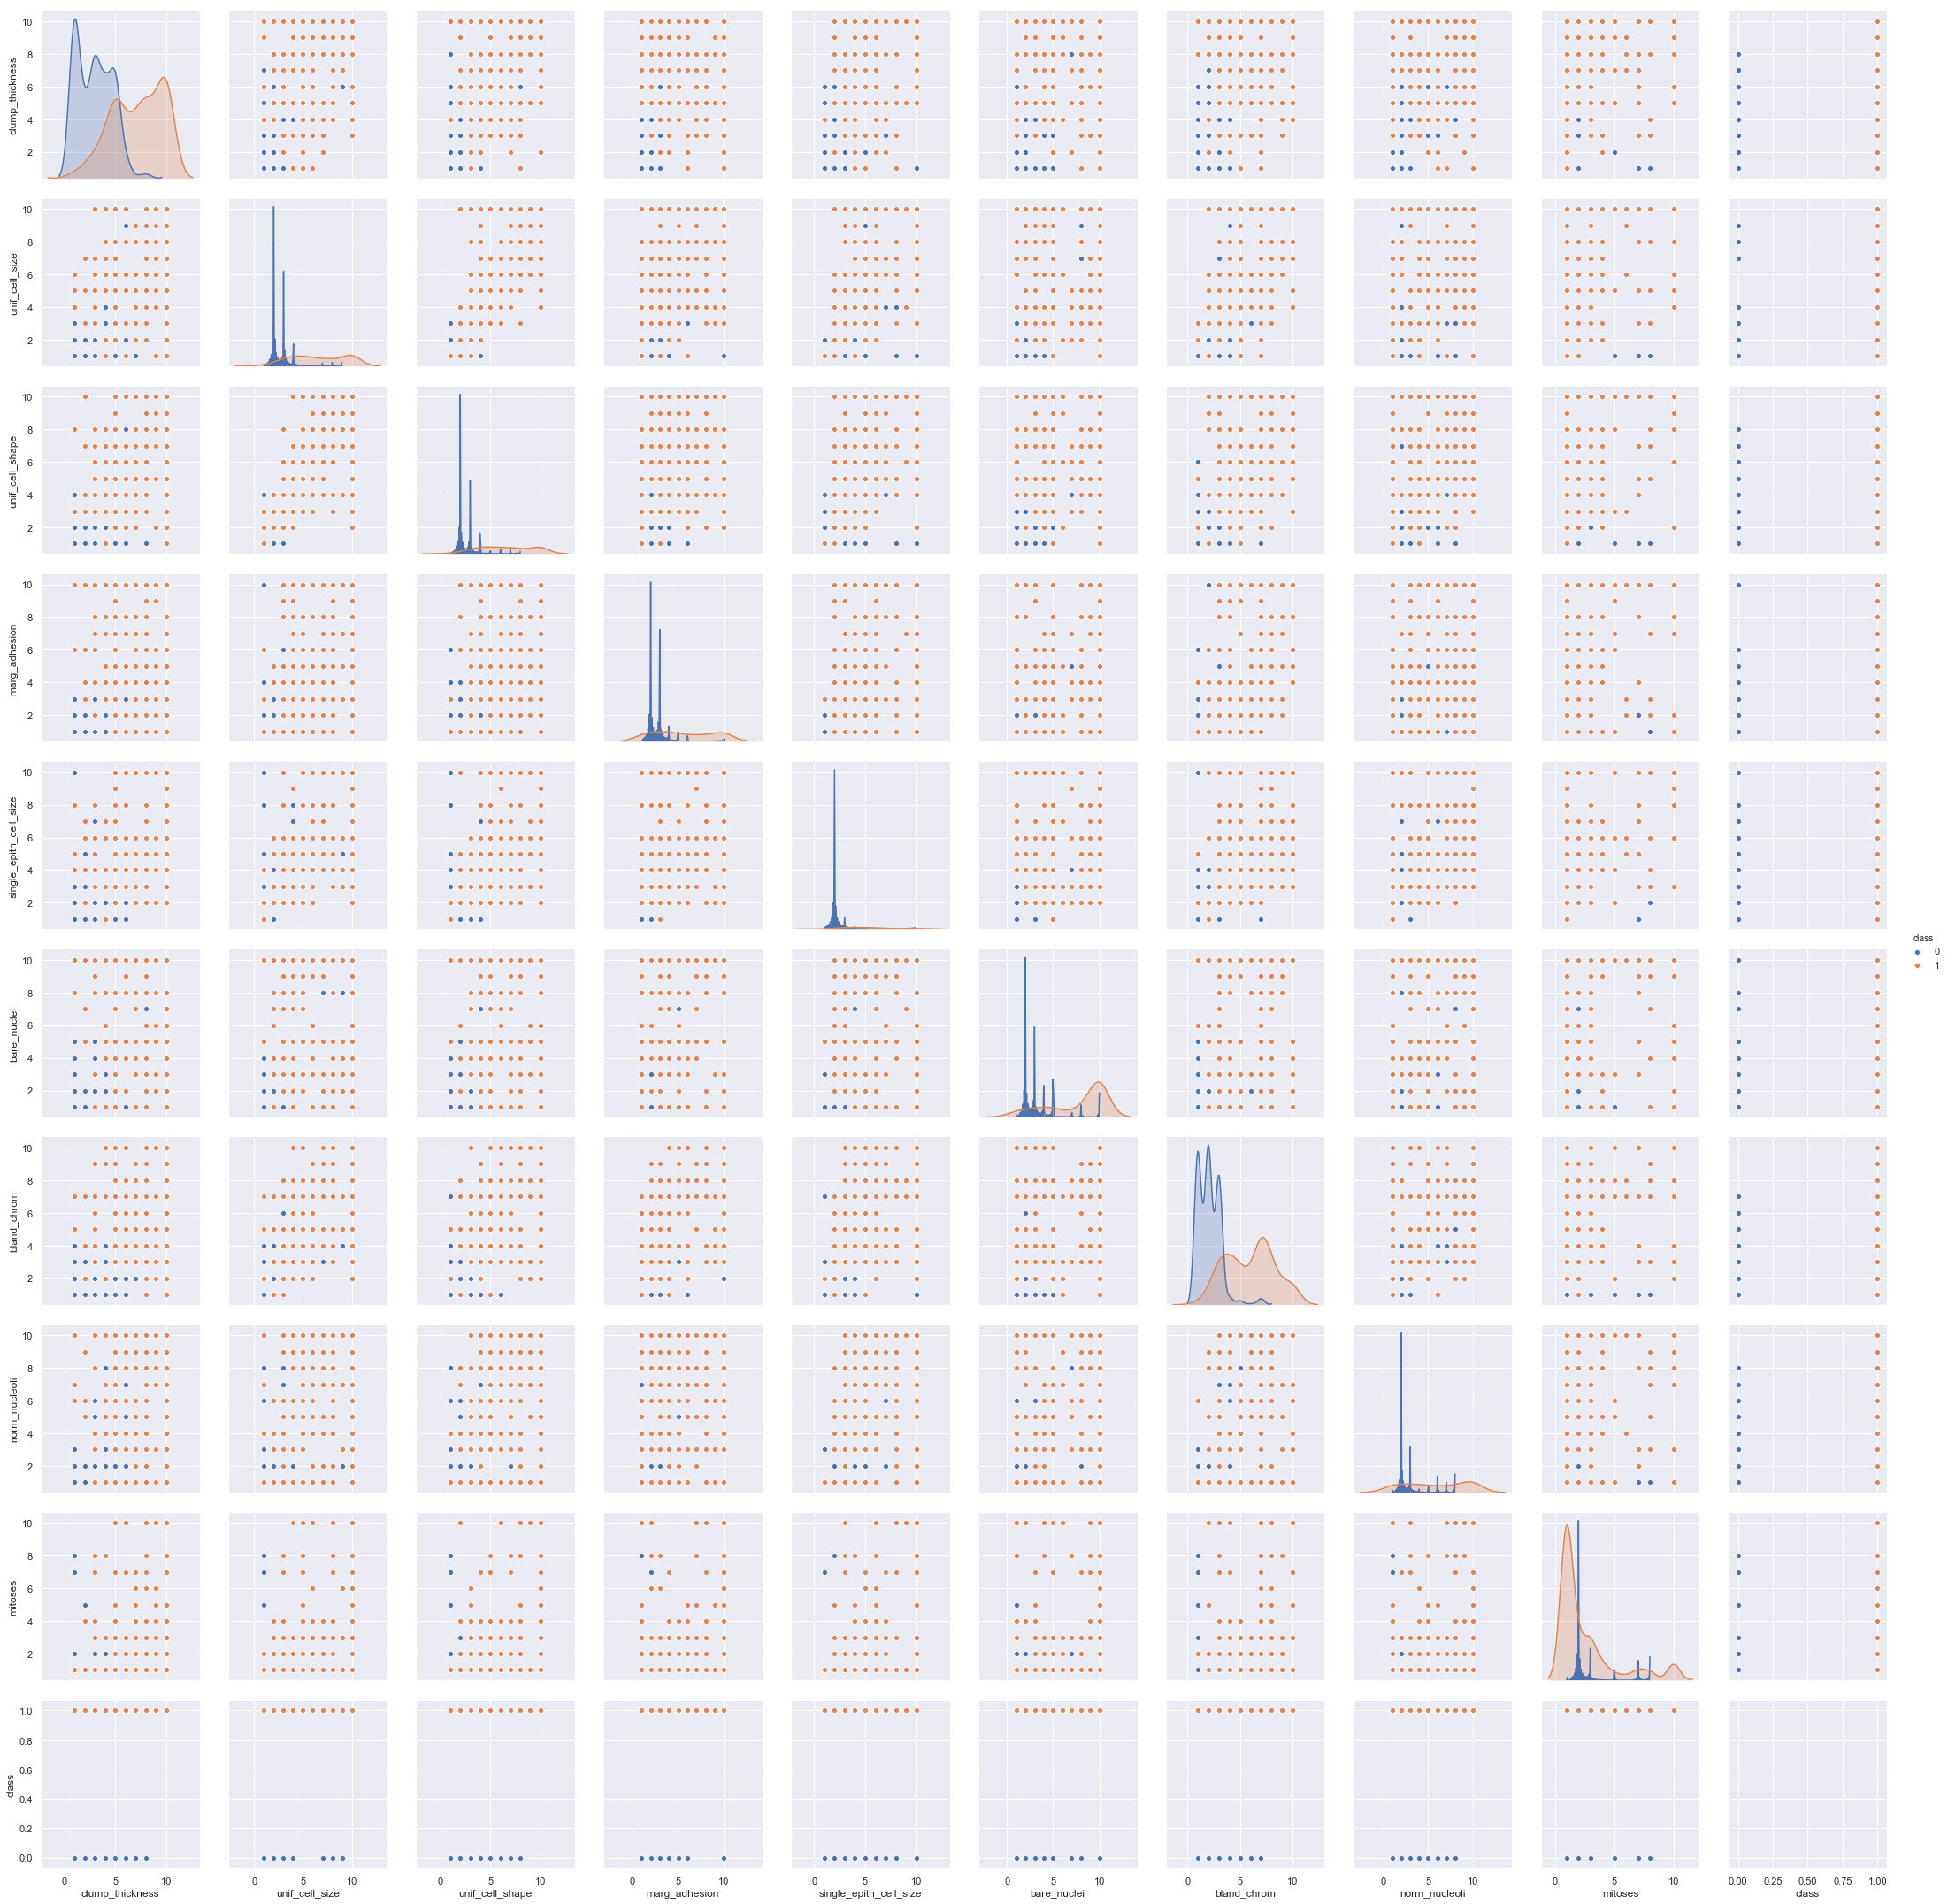

In [16]:
sns.pairplot(formattedDataFile, hue='class', height=3, aspect=1)

The pair plot above gives us the ability to see both distribution of each attribute and the relationships between each pair of attributes.  Blue dots are 0 or benign and orange is malignant or 1

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a3d0ab358>,
      dtype=object)

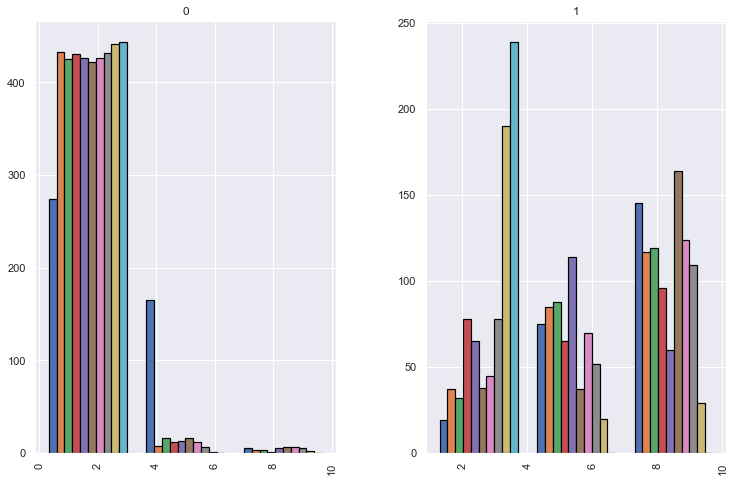

In [30]:
formattedDataFile.hist(by='class', bins=3, histtype='bar',
                       edgecolor='black', linewidth=1.2, figsize=(12,8))

# Modeling
The next steps in creating a Neural Network Classifier is to split our data up into a training set and a testing set.  The testing set allows us to see how accurate our model is.  The formatted data was randomly split up by our tutorial into a file with 6 records for testing and the remaining for training.  With python we have the ability to adjust that distribution to see what works best.

In [18]:
training_file = pd.read_csv('./breastcancer/cancer_training.csv',
                           skiprows=[0], header=-1)
training_file.head()

,0,1,2,3,4,5,6,7,8,9
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [19]:
test_file = pd.read_csv('./breastcancer/cancer_test.csv',
                       skiprows=[0], header=-1)
test_file.head()

,0,1,2,3,4,5,6,7,8,9
0,3,1,1,1,2,1,2,1,2,0
1,3,1,1,1,3,2,1,1,1,0
2,2,1,1,1,2,1,1,1,1,0
3,5,10,10,3,7,3,8,10,2,1
4,4,8,6,4,3,4,10,6,1,1


## Building our Neural Classifier
Above our training and test files contain a header row that is specific for tensorflow.

```Python
#Number of rows, Number of columns (excluding the class), benign, malignent
```

That is, we have a comma-separated list of elements prepended to the beginning of the file for our train and test data sets that let TensorFlow know how many rows, columns (excluding the column we are trying to predict), and list of potential outcomes for our model (in our case; benign or malignant).

## Training & Testing

In [20]:
#Create constants to represent our data files
CANCER_TRAINING = "./breastcancer/cancer_training.csv"
CANCER_TEST = "./breastcancer/cancer_test.csv"

#Use the tensorflow library to load in our datasets
def set_training_set(training_filepath):
    return tf.contrib.learn.datasets.base.load_csv_with_header(
        filename=training_filepath, target_dtype=np.int,
        features_dtype=np.float32, target_column=-1)

def set_test_set(test_filepath):
    return tf.contrib.learn.datasets.base.load_csv_with_header(
        filename=test_filepath, target_dtype=np.int,
        features_dtype=np.float32, target_column=-1)

# Specify that all features (attributes) have real-value data
feature_columns = [tf.contrib.layers.real_valued_column("", dimension=2)]

# Building a Deep Learning Neural Network
Neural networks are a set of algorithms, modeled loosely after the human brain, that are designed to recognize patterns. They interpret sensory data through a kind of machine perception, labeling or clustering raw input. The patterns they recognize are numerical, contained in vectors, into which all real-world data, be it images, sound, text or time series, must be translated.

Neural networks help us cluster and classify. You can think of them as a clustering and classification layer on top of the data you store and manage. They help to group unlabeled data according to similarities among the example inputs, and they classify data when they have a labeled dataset to train on. (Neural networks can also extract features that are fed to other algorithms for clustering and classification; so you can think of deep neural networks as components of larger machine-learning applications involving algorithms for reinforcement learning, classification and regression.)

Deep learning is the name we use for “stacked neural networks”; that is, networks composed of several layers.

The layers are made of nodes. A node is just a place where computation happens, loosely patterned on a neuron in the human brain, which fires when it encounters sufficient stimuli. A node combines input from the data with a set of coefficients, or weights, that either amplify or dampen that input, thereby assigning significance to inputs for the task the algorithm is trying to learn. (For example, which input is most helpful is classifying data without error?) These input-weight products are summed and the sum is passed through a node’s so-called activation function, to determine whether and to what extent that signal progresses further through the network to affect the ultimate outcome, say, an act of classification, which is what we are doing with our breast cancer data: classifying it into benign or malignant.

Deep-learning networks are distinguished from the more commonplace single-hidden-layer neural networks by their depth; that is, the number of node layers through which data passes in a multistep process of pattern recognition.

Earlier versions of neural networks were shallow, composed of one input and one output layer, and at most one hidden layer in between. More than three layers (including input and output) qualifies as “deep” learning. So deep is a strictly defined, technical term that means more than one hidden layer.

In deep-learning networks, each layer of nodes trains on a distinct set of features based on the previous layer’s output. The further you advance into the neural net, the more complex the features your nodes can recognize, since they aggregate and recombine features from the previous layer.



In [21]:
# Build a 3 hidden layer DNN with 10, 20, 10 units (neurons) respectively.
classifier = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns,
                                            hidden_units=[10, 20, 10],
                                            n_classes=2,
                                            model_dir="/tmp/cancer_model")

# Fit (train) the model by iterating over the training data for 2000
#steps.
training_set = set_training_set(CANCER_TRAINING)

classifier.fit(x=training_set.data, 
               y=training_set.target, 
               steps=2000)

Instructions for updating:
Please switch to tf.contrib.estimator.*_head.
Instructions for updating:
Please replace uses of any Estimator from tf.contrib.learn with an Estimator from tf.estimator.*
Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.RunConfig instead.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a3a8f4048>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_

INFO:tensorflow:loss = 0.00039775897, step = 18811 (0.704 sec)
INFO:tensorflow:global_step/sec: 177.453
INFO:tensorflow:loss = 0.00039424686, step = 18911 (0.563 sec)
INFO:tensorflow:global_step/sec: 187.657
INFO:tensorflow:loss = 0.0003908778, step = 19011 (0.533 sec)
INFO:tensorflow:global_step/sec: 187.469
INFO:tensorflow:loss = 0.00038753796, step = 19111 (0.533 sec)
INFO:tensorflow:global_step/sec: 183.62
INFO:tensorflow:loss = 0.00038431157, step = 19211 (0.545 sec)
INFO:tensorflow:global_step/sec: 167.191
INFO:tensorflow:loss = 0.00038114036, step = 19311 (0.598 sec)
INFO:tensorflow:global_step/sec: 186.197
INFO:tensorflow:loss = 0.00037754278, step = 19411 (0.537 sec)
INFO:tensorflow:Saving checkpoints for 19510 into /tmp/cancer_model/model.ckpt.
INFO:tensorflow:Loss for final step: 0.00037443984.


DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._BinaryLogisticHead object at 0x1a3a92d080>, 'hidden_units': [10, 20, 10], 'feature_columns': (_RealValuedColumn(column_name='', dimension=2, default_value=None, dtype=tf.float32, normalizer=None),), 'optimizer': None, 'activation_fn': <function relu at 0x124414488>, 'dropout': None, 'gradient_clip_norm': None, 'embedding_lr_multipliers': None, 'input_layer_min_slice_size': None})

# Evaluation
How did our neural network do?
## Accuracy

In [22]:
# Evaluate accuracy.
test_set = set_test_set(CANCER_TEST)
accuracy_score = classifier.evaluate(x=test_set.data,
                                     y=test_set.target)["accuracy"]

print('Accuracy: {0:f}'.format(accuracy_score))

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
INFO:tensorflow:Starting evaluation at 2018-10-12-00:16:37
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/cancer_model/model.ckpt-19510
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-10-12-00:16:38
INFO:tensorflow:Saving dict for global step 19510: accuracy = 1.0, accuracy/b

The model returned an accuracy score of 100%.  Granted we only used 6 records to test the model and we knew what those records were classified as.  We can adjust the training and testing sets to train less and test more and see what effect that has on accuracy.  See Below...

In [23]:
training_set = set_training_set('./breastcancer/cancer_training_70_percent.csv')
test_set = set_test_set('./breastcancer/cancer_test_30_percent.csv')
classifier.fit(x=training_set.data, 
               y=training_set.target, 
               steps=2000)

accuracy_score = classifier.evaluate(x=test_set.data,
                                     y=test_set.target)["accuracy"]

print('Accuracy: {0:f}'.format(accuracy_score))

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/cancer_model/model.ckpt-19510
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 19510 into /tmp/cancer_model/model.ckpt.
INFO:tensorflow:loss = 0.0004847778, step = 19511
INFO:tensorflow:global_step/sec: 152.32
INFO:tensorflow:loss = 0.00047041097, step = 19611 (0.658 sec)
INFO:tensorflow:global_step/sec: 235.927
INFO:tensorflow:loss = 0.00046144731, step = 19711 (0.423 sec)
INFO:tensorflow:global_step/sec: 241.146
INFO:tensorflow:loss = 0.00045356617, step = 19811 (0.415 sec)
INFO:tensorflow:global_step/sec: 248.105
INFO:tensorflow:loss = 0.00044713565, step = 19911 (0.403 sec)
INFO:tensorflow:global_step/sec: 249.097
INFO:tensorflow:loss = 0.0004405455, step = 20011 (0.401 sec)
INFO:tensorflow:global_step/sec: 220.025
INFO:tensorflow:loss = 0.0004338763, step = 20111 (0.454 sec)
INFO:ten

The accuracy dropped just a little bit with the lower training.  This is a trait of neural networks.

In [24]:
confusion_matrix = tf.contrib.metrics.confusion_matrix(
    labels = predictions, predictions = predictions, num_classes = 2,
    dtype = float)
print(confusion_matrix)

NameError: name 'predictions' is not defined

# Predictive Capability
Is it accurate for unkown samples? Unfortunately we don't have cancer patitents that we can biopsy and then attempt to classify their tumors as malignant or benign, but we can simulate that process by creating new tumor sample values and seeing what our neural network says.  Remember 0 is benign and 1 is malignant.

In [28]:
# Classify two new cancer tumor samples.  these values are arbitrary
# Whether or not a real sample would generate these values is unknown
def new_samples():
  return np.array([
      [5, 10, 8, 4, 7, 4, 8, 11, 2],
      [5, 1, 1, 1, 1, 1, 1, 1, 2],
      [10,10,10,10,10,10,10,10,10], # <- do high numbers correspond to malignancy?
      [5,5,5,5,5,5,5,5,5],          # <- do high numbers correspond to malignancy?
      [1,1,1,1,1,1,1,1,1]           # <- do low numbers correspond to benigness?
                  ], dtype=np.float32)


predictions = list(classifier.predict_classes(input_fn=new_samples))

print("New Samples, Class Predictions:    {}\n"
      .format(predictions))

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/cancer_model/model.ckpt-21510
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
New Samples, Class Predictions:    [1, 0, 1, 1, 0]



NOTES: create a spreadsheet with 20-30 representative samples and use that as interface.  SAve and then switch to notebook and run the predictive code above.

# TODO
This program is a simple example that illustrates how modern data analysis tools and programming libraries can allow the data scientist to quickly analyze data and create a powerful machine learning based tool to aid in deeper data analysis and even predictions.

The next step would be to continue testing this classifier with different data values, continue to evaluate it with different or generated records.

In theory if we were satisfied with the model we would deploy it to a server where it could be used by multiple users.

# Followup testing.
As noted above in order to exercise our neural network it would be nice to see how it does on more records.  Since 99% of the Wisconsin data was used for training it would be nice to see if we can utilize some other data and use our prediction capability and see how it does.  Unfortunately although there are many other breast cancer data sets publicly available, they do not contain the same attributes and the Wisconsin data set and so could not be used in a comparison.

### Todo:
Utilize a different data set and simply see how the DNN does on accuracy with those attributes.

# References
[Tutorial followed](http://vprusso.github.io/blog/2016/tensor-flow-neural-net-breast-cancer/)<br>
Author:Vincent Russo<br><br>
[Beginners guide to Neural networks](https://skymind.ai/wiki/neural-network)